IMDb Movies dataset

Step 1: Load and Overview

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


Step 2: Clean Data

In [14]:
missing=df.isnull().sum()
missing_percent=(missing/len(df))*100
missing_data=pd.DataFrame({'missing_count':missing,'missing_percent':missing_percent})
missing_data.sort_values(by='missing_percent',ascending=False)

,missing_count,missing_percent
Gross,169,16.9
Meta_score,157,15.7
Certificate,101,10.1
Poster_Link,0,0.0
Runtime,0,0.0
Genre,0,0.0
Series_Title,0,0.0
Released_Year,0,0.0
Overview,0,0.0
IMDB_Rating,0,0.0


insight:Gross and Meta_score are missing in about 16% of IMDB Top 1000 records, Certificate in 10%, but all other fields are complete and reliable for analysis.

In [18]:
# ---------------------------------------------------------
# 3️⃣ Data Cleaning  — FutureWarning-free version
# ---------------------------------------------------------

print("\n Removing Duplicates...")
df = df.drop_duplicates()
print("Remaining duplicates:", df.duplicated().sum())

# Released_Year — convert and fill
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df['Released_Year'] = df['Released_Year'].fillna(df['Released_Year'].median())

# Runtime — clean 'min' and convert
df['Runtime'] = df['Runtime'].astype(str).str.replace(' min', '', regex=True)
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')
df['Runtime'] = df['Runtime'].fillna(df['Runtime'].median())

# IMDB_Rating — ensure numeric and fill
df['IMDB_Rating'] = pd.to_numeric(df['IMDB_Rating'], errors='coerce')
df['IMDB_Rating'] = df['IMDB_Rating'].fillna(df['IMDB_Rating'].mean())

# Meta_score — ensure numeric and fill
df['Meta_score'] = pd.to_numeric(df['Meta_score'], errors='coerce')
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].mean())

# Gross — remove commas, convert, fill
df['Gross'] = df['Gross'].astype(str).str.replace(',', '', regex=True)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')
df['Gross'] = df['Gross'].fillna(df['Gross'].median())

# Certificate — fill missing
df['Certificate'] = df['Certificate'].fillna('Unknown')

print("\n After Cleaning:")
print("Missing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
print("\nDataset shape:", df.shape)



 Removing Duplicates...
Remaining duplicates: 0

 After Cleaning:
Missing values:
 Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

Data types:
 Poster_Link       object
Series_Title      object
Released_Year    float64
Certificate       object
Runtime            int64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

Dataset shape: (1000, 16)


In [19]:
display(df.describe())


,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1.000000e+03
mean,1991.225000,122.891000,7.949300,77.97153,2.736929e+05,6.051360e+07
std,23.286662,28.093671,0.275491,11.36206,3.273727e+05,1.014192e+08
min,1920.000000,45.000000,7.600000,28.00000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,72.00000,5.552625e+04,5.012919e+06
50%,1999.000000,119.000000,7.900000,77.97153,1.385485e+05,2.353089e+07
75%,2009.000000,137.000000,8.100000,85.25000,3.741612e+05,6.153989e+07
max,2020.000000,321.000000,9.300000,100.00000,2.343110e+06,9.366622e+08


Step 3: Univariate Analysis
3.1 Numerical Features

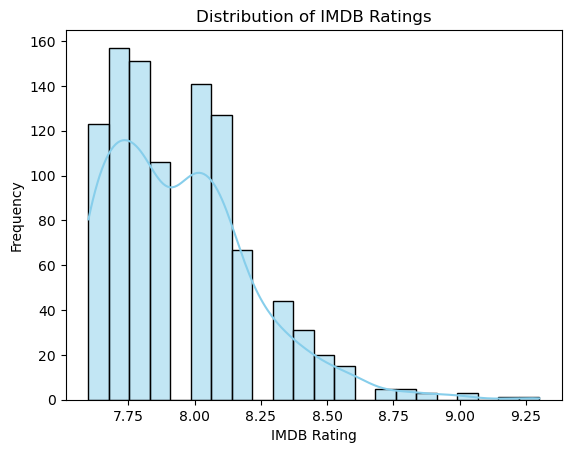

In [21]:
sns.histplot(df['IMDB_Rating'],kde=True,color='skyblue')
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.show()

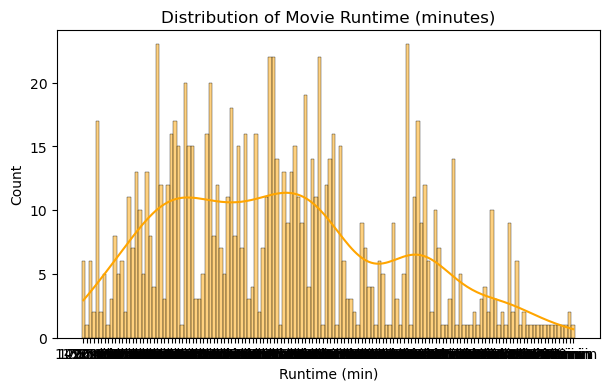

In [3]:
# Runtime Distribution
plt.figure(figsize=(7,4))
sns.histplot(df['Runtime'], kde=True, color='orange')
plt.title('Distribution of Movie Runtime (minutes)')
plt.xlabel('Runtime (min)')
plt.show()

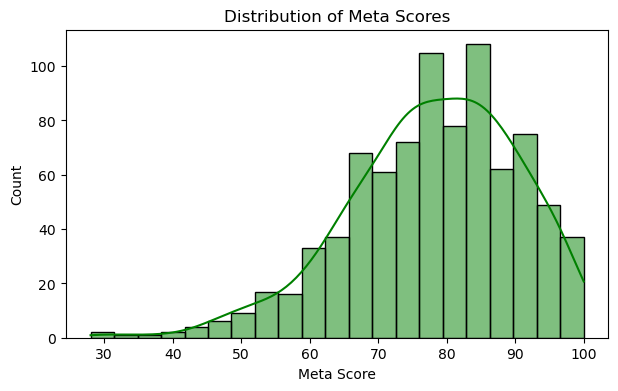

In [4]:
# Meta Score Distribution
plt.figure(figsize=(7,4))
sns.histplot(df['Meta_score'], kde=True, color='green')
plt.title('Distribution of Meta Scores')
plt.xlabel('Meta Score')
plt.show()

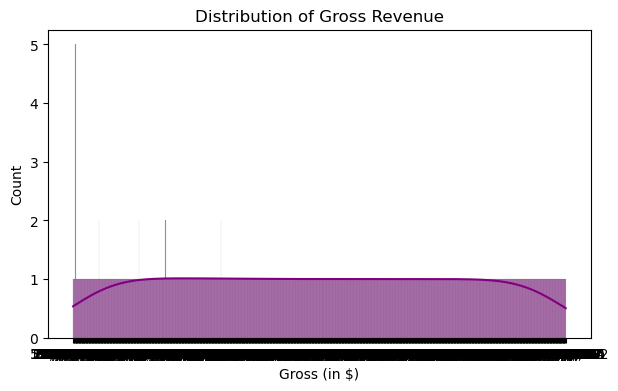

In [5]:
# Gross Revenue Distribution
plt.figure(figsize=(7,4))
sns.histplot(df['Gross'], kde=True, color='purple')
plt.title('Distribution of Gross Revenue')
plt.xlabel('Gross (in $)')
plt.show()

C:\Users\Hello\AppData\Local\Temp\ipykernel_12684\3454878205.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Certificate', data=df, palette='Set2')


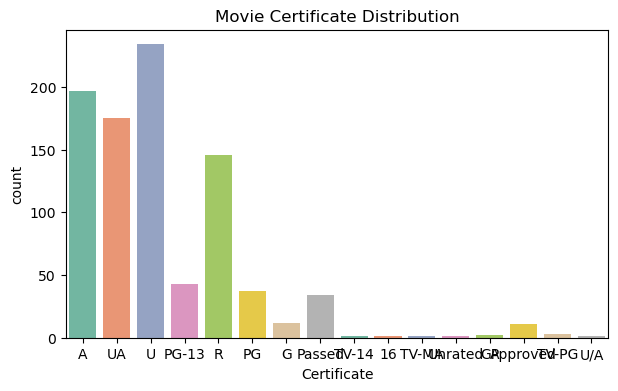

In [ ]:
# Certificate Count
plt.figure(figsize=(7,4))
sns.countplot(x='Certificate',hue='' data=df, palette='Set2')
plt.title('Movie Certificate Distribution')
plt.show()

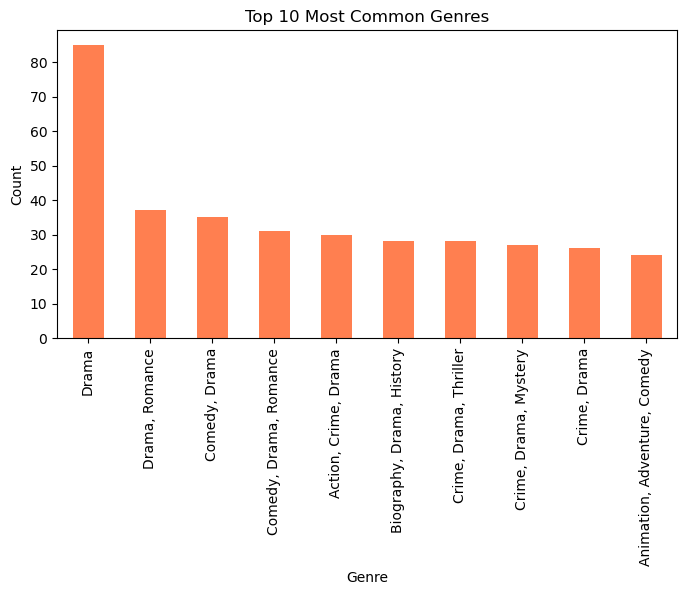

In [7]:
# Genre Frequency (top 10)
plt.figure(figsize=(8,4))
df['Genre'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Most Common Genres')
plt.ylabel('Count')
plt.show()

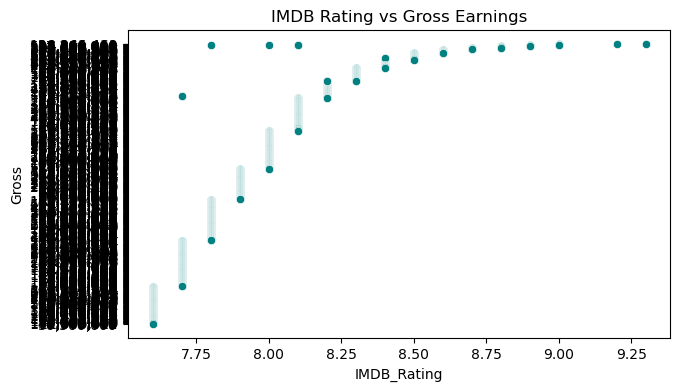

In [8]:

# IMDB Rating vs Gross
plt.figure(figsize=(7,4))
sns.scatterplot(x='IMDB_Rating', y='Gross', data=df, color='teal')
plt.title('IMDB Rating vs Gross Earnings')
plt.show()

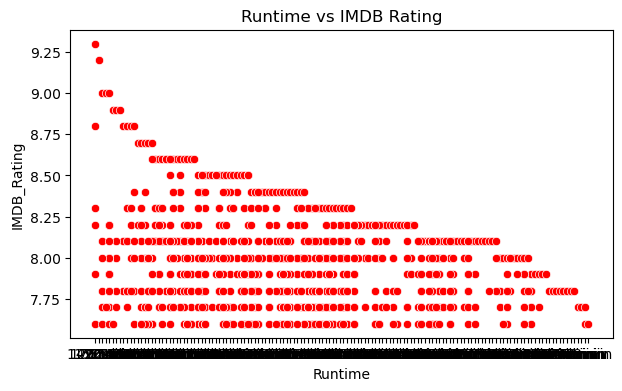

In [9]:
# Runtime vs IMDB Rating
plt.figure(figsize=(7,4))
sns.scatterplot(x='Runtime', y='IMDB_Rating', data=df, color='red')
plt.title('Runtime vs IMDB Rating')
plt.show()